In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("simulation"))))
import cusum_chart
import Configurations
from utils import modelUtils
from utils import plotUtils
from simulation import simulationProfile as profiles
import random
from tensorflow import keras
import keras.layers as layers
from matplotlib import pyplot as plt
import numpy  as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.layers import Input,Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model
import pandas as pd


Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10
main dir: ../


In [2]:
#profiles
#profiles.setProfile_7x_m13_randShift()
#profiles.setProfile_7x_m08_randShift()
#profiles.setProfile_7x_m04_randShift()
neuralInputsNumber = Configurations.neuralInputsNumber
targetVarNumber = Configurations.numberOftargetVariables
x, y, test_x, test_y = modelUtils.getTrainAndTestData()
print(x[0])

[-0.31944841  1.03101702 -0.30723264 -0.96339655 -0.13580195 -2.84086472
 -1.77374317]


In [3]:
x,y=cusum_chart.calculateAndAdd_So_Su(x,y)
test_x, test_y=cusum_chart.calculateAndAdd_So_Su(test_x, test_y)
print(len(x[0]))
print(x[0])
print(y[0])
print("")
print(x[len(x)-1])
print(y[len(y)-1])

9
[-0.31944841  1.03101702 -0.30723264 -0.96339655 -0.13580195 -2.84086472
 -1.77374317  0.          0.        ]
[ 0.         0.         0.         1.         0.         0.
 -4.2019485]

[  0.79848851   0.88684299  -0.51314588   1.82932793   0.29461773
   0.25229668  -0.16740228   0.         -34.56667029]
[  0.           0.           0.           0.           1.
   0.73527437 -28.53989331]


In [11]:
neuralInputsNumber = len(x[0])
Y= y[:,0:5]
Z = y[:,5:7]
print(Z)

[[  0.         -19.85525898]
 [  0.89954658 -15.75497839]
 [ 15.79052518   0.        ]
 ...
 [  3.95179999 -26.05752888]
 [  5.74583964 -18.97198661]
 [  1.30277426 -18.12354937]]


Epoch 1/50
157/157 [==============================] - 1s 807us/step - loss: 76.3048 - chart_loss: 0.8424 - cusum_loss: 75.4624 - chart_accuracy: 0.2876 - cusum_mean_squared_error: 75.4624
Epoch 2/50
157/157 [==============================] - 0s 1ms/step - loss: 1.5119 - chart_loss: 0.4198 - cusum_loss: 1.0921 - chart_accuracy: 0.5182 - cusum_mean_squared_error: 1.0921
Epoch 3/50
157/157 [==============================] - 0s 1ms/step - loss: 0.9045 - chart_loss: 0.3677 - cusum_loss: 0.5368 - chart_accuracy: 0.5644 - cusum_mean_squared_error: 0.5368
Epoch 4/50
157/157 [==============================] - 0s 1ms/step - loss: 0.6103 - chart_loss: 0.3311 - cusum_loss: 0.2791 - chart_accuracy: 0.6132 - cusum_mean_squared_error: 0.2791
Epoch 5/50
157/157 [==============================] - 0s 1ms/step - loss: 0.4895 - chart_loss: 0.3033 - cusum_loss: 0.1862 - chart_accuracy: 0.6442 - cusum_mean_squared_error: 0.1862
Epoch 6/50
157/157 [==============================] - 0s 1ms/step - loss: 0.4300

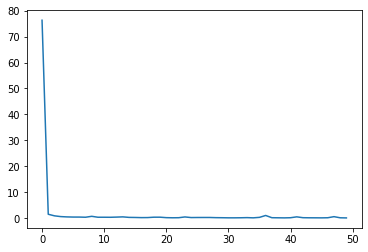

In [93]:
#structer one
structure="_1_"
input_layer = Input(shape=(neuralInputsNumber),name="Eingabeschicht")
layer_1 = Dense(120, activation='relu')(input_layer)
layer_2 = Dense(120, activation='relu')(layer_1)
layer_3 = Dense(60,activation='relu')(layer_2)
layer_4 = Dense(60,activation='relu')(layer_3)
y1_output = Dense(5, name='chart',activation='sigmoid')(layer_4)

# layer_1 = Dense(175, activation='relu')(input_layer)
# layer_2 = Dense(175, activation='relu')(layer_1)
# layer_3 = Dense(175,activation='relu')(layer_2)

y2_output = Dense(2,name='cusum')(layer_4)

model = Model(inputs=input_layer,outputs=[y1_output, y2_output])

#optimizer = keras.optimizers.SGD(lr=0.001)

model.compile(optimizer="adam",
              loss={'chart': 'binary_crossentropy', 'cusum': 'MeanSquaredError'},
 metrics={'chart':'accuracy',
          'cusum':'MeanSquaredError'})
# Train the model for 100 epochs
history = model.fit(x, {'chart': Y, 'cusum': Z},
   epochs=50, batch_size=32)

plt.plot(history.history['loss'])

#keras.metrics.RootMeanError()

Epoch 1/50
157/157 [==============================] - 1s 786us/step - loss: 107.6783 - chart_loss: 0.3908 - cusum_loss: 107.2875 - chart_accuracy: 0.5874 - cusum_mean_squared_error: 107.2875
Epoch 2/50
157/157 [==============================] - 0s 799us/step - loss: 1.3538 - chart_loss: 0.2076 - cusum_loss: 1.1462 - chart_accuracy: 0.7730 - cusum_mean_squared_error: 1.1462
Epoch 3/50
157/157 [==============================] - 0s 733us/step - loss: 0.8126 - chart_loss: 0.1577 - cusum_loss: 0.6548 - chart_accuracy: 0.8492 - cusum_mean_squared_error: 0.6548
Epoch 4/50
157/157 [==============================] - 0s 711us/step - loss: 0.4445 - chart_loss: 0.1276 - cusum_loss: 0.3169 - chart_accuracy: 0.8894 - cusum_mean_squared_error: 0.3169
Epoch 5/50
157/157 [==============================] - 0s 732us/step - loss: 0.3100 - chart_loss: 0.1114 - cusum_loss: 0.1986 - chart_accuracy: 0.9076 - cusum_mean_squared_error: 0.1986
Epoch 6/50
157/157 [==============================] - 0s 742us/step -

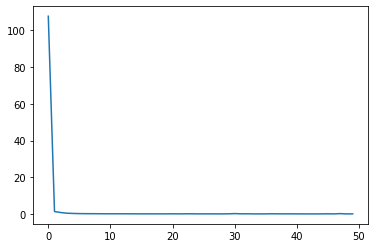

In [108]:
#structer 2
structure="_2_"
input_layer = Input(shape=(neuralInputsNumber),name="Eingabeschicht")
layer_1 = Dense(75, activation='relu')(input_layer)
layer_2 = Dense(75, activation='relu')(layer_1)
y1_output = Dense(5, name='chart',activation='sigmoid')(layer_2)

layer_1 = Dense(120, activation='relu')(input_layer)
layer_2 = Dense(120, activation='relu')(layer_1)
#layer_3 = Dense(175,activation='relu')(layer_2)
y2_output = Dense(2,name='cusum')(layer_2)

model = Model(inputs=input_layer,outputs=[y1_output, y2_output])


model.compile(optimizer="adam",
              loss={'chart': 'binary_crossentropy', 'cusum': 'MeanSquaredError'},
 metrics={'chart':'accuracy',
          'cusum':'MeanSquaredError'})

history = model.fit(x, {'chart': Y, 'cusum': Z},
   epochs=50, batch_size=32)

plt.plot(history.history['loss'])



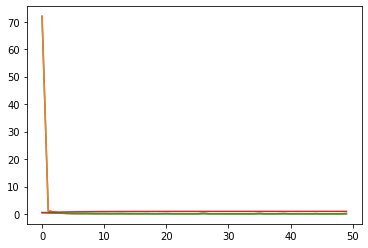

In [89]:

#print(history.history)
plt.plot(history.history['cusum_loss'])
plt.plot(history.history['cusum_mse'])
#plt.plot(history.history['cusum_mean_squared_error'])
#plt.plot(history.history['cusum_root_mean_squared_error'])
#plt.plot(history.history['cusum_mean_absolute_error'])
plt.plot(history.history['chart_loss'])
plt.plot(history.history['chart_accuracy'])

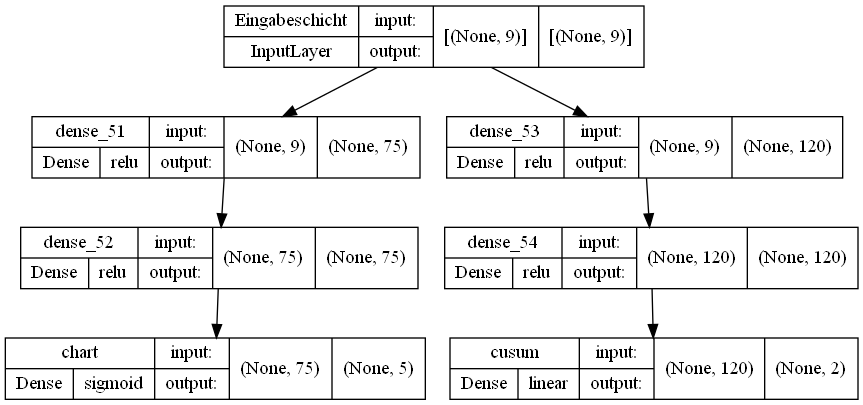

In [109]:

plot_model(model, to_file='dnn_cusum'+structure+'model_plot.png', show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [115]:
#test
#a = random.randrange(0,5000)
a =0
#print(test_x[a])

def roundBinaryResualts(result):
    tmp = [0,0,0,0,0]
    tmp[np.argmax(result)]=1
    return tmp
    
result = model.predict(test_x[a:a+1])
print(roundBinaryResualts(result[0]))
print(test_y[a])


print(result[1])
#model.save("../saved_model/cusum_dnn/cusum_dnn_"+structure+".h5")

[0, 0, 0, 1, 0]
[ 0.         0.         0.         1.         0.         0.
 -5.4701146]
[[-0.01393108 -4.816586  ]]


In [4]:
#load model
model =keras.models.load_model("../saved_model/cusum_dnn/cusum_dnn_"+"_1_"+".h5")

In [5]:
# prediction
Z_pred_test = model.predict(test_x)[1]
Z_test=test_y[:,5:7]
print(Z_test[0])
print(" ")
print(Z_pred_test[0])
res = cusum_chart.correctError(Z_pred_test)

#print(Z_pred_test[0][1])
#print(round(Z_pred_test[0][1], -3))

[ 0.        -5.4701146]
 
[-0.09513422 -5.324073  ]


In [7]:
#mse
#mean_squared_error(Z, Z_pred, squared=False)
#print(Z[0])
print(Z_pred_test[0])
print("-")
print("mean squared error:")
mse= mean_squared_error(Z_test, Z_pred_test)
print(mse)

print("-")
#rmse
print("-root mean_squared_error:")
print(mean_squared_error(Z_test, Z_pred_test, squared=False))

print("-")
#mae
print("Mean Absolute Error (MAE) mae:")
mae=mean_absolute_error(Z_test, Z_pred_test)
print(mae)




[-0.09513422 -5.324073  ]
-
mean squared error:
0.03043244840847393
-
-root mean_squared_error:
0.17426787230700658
-
Mean Absolute Error (MAE) mae:
0.12422208292275261


In [8]:
suffix="cusum_dnn"+structure
score = {
    "Mean Squared Error":[mse],
    "Mean Absolute Error":[mae],
}
df = pd.DataFrame(score)
exportPath="../scores/"+suffix+"/"+suffix+"_score.xls"
print(exportPath)
df.to_excel(exportPath, index=False)
df.head()

NameError: name 'structure' is not defined

In [10]:
#mse
#mean_squared_error(Z, Z_pred, squared=False)
#print(Z[0])
print(Z_pred_test[0])
print("-")
print("mean squared error:")
mse= mean_squared_error(Z_test, res)
print(mse)

print("-")
#rmse
print("-root mean_squared_error:")
print(mean_squared_error(Z_test, res, squared=False))

print("-")
#mae
print("Mean Absolute Error (MAE) mae:")
mae=mean_absolute_error(Z_test, res)
print(mae)

suffix="cusum_dnn"+structure
score = {
    "Mean Squared Error":[mse],
    "Mean Absolute Error":[mae],
}
suffix="cusum_dnn_corected"
df = pd.DataFrame(score)
exportPath="../scores/"+suffix+"/"+suffix+"corrected_score.xls"
print(exportPath)
df.to_excel(exportPath, index=False)
df.head()

[-0.09513422 -5.324073  ]
-
mean squared error:
0.030087621077109897
-
-root mean_squared_error:
0.17323879468852543
-
Mean Absolute Error (MAE) mae:
0.1212726307726984


NameError: name 'structure' is not defined